# Lógica ML

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import math
import seaborn as sns

In [33]:
# tomamos el ID como indice
movies_ml_df = pd.read_csv("transformed_consultas/movies_ml_df.csv", index_col="id")

In [34]:
# Revision del dataset.
movies_ml_df.head()

,release_year,vote_average,popularity_log,vote_count_log,title_collection,concat_country_language,genres,production_companies,Overview_pca_1,Overview_pca_2,Overview_pca_3,Overview_pca_4,Overview_pca_5,Overview_pca_6,Overview_pca_7,Overview_pca_8,Overview_pca_9,Overview_pca_10
id,,,,,,,,,,,,,,,,,,
2,1988,7.1,1.581139,3.806662,"('ariel',)","('de', 'fi')","('Drama', 'Crime')","('Finnish Film Foundation', 'Villealfa Filmpro...",-0.059245,0.287946,-0.129547,-0.008717,-0.191959,0.032205,-0.046159,0.276679,-0.021542,0.014924
3,1986,7.1,1.191529,3.583519,"('shadow', 'paradise')","('sv', 'en', 'fi')","('Comedy', 'Drama')","('Villealfa Filmproduction Oy',)",-0.070060,0.487846,0.373337,0.431613,-0.056732,0.472987,-0.241054,0.016674,0.052932,0.038122
5,1995,6.5,2.305240,6.291569,"('room',)","('en', 'us')","('Comedy', 'Crime')","('Miramax Films', 'A Band Apart')",-0.003963,-0.033321,-0.024928,-0.062604,-0.013472,0.006061,-0.011053,-0.040659,-0.001959,-0.041297
6,1993,6.4,1.877734,4.382027,"('night', 'judgment')","('en', 'jp', 'us')","('Action', 'Crime', 'Thriller')","('Universal Pictures', 'Largo Entertainment', ...",-0.053165,-0.077903,-0.042561,-0.071470,-0.045343,0.025141,-0.054225,-0.101491,-0.045622,-0.188094
11,1977,8.1,3.764675,8.821585,"('star', 'war')","('en', 'us')","('Action', 'Adventure', 'Science Fiction')","('Lucasfilm', 'Twentieth Century Fox Film Corp...",-0.026597,-0.053522,-0.041591,-0.089935,-0.019957,0.038030,0.007911,-0.063810,-0.025875,-0.053301


In [35]:
movies_ml_df.describe()

,release_year,vote_average,popularity_log,vote_count_log,Overview_pca_1,Overview_pca_2,Overview_pca_3,Overview_pca_4,Overview_pca_5,Overview_pca_6,Overview_pca_7,Overview_pca_8,Overview_pca_9,Overview_pca_10
count,44013.000000,44013.000000,44013.000000,44013.000000,4.401300e+04,4.401300e+04,4.401300e+04,4.401300e+04,4.401300e+04,4.401300e+04,4.401300e+04,4.401300e+04,4.401300e+04,4.401300e+04
mean,1991.741940,5.648788,0.997769,2.692927,-1.104850e-16,-1.178507e-16,-5.973254e-18,-1.306044e-16,-3.899768e-17,-4.046072e-17,-8.717722e-17,5.000582e-17,-2.984609e-17,-2.728324e-17
std,24.149688,1.881493,0.805783,1.727406,1.994227e-01,1.770322e-01,1.731813e-01,1.683892e-01,1.633136e-01,1.606475e-01,1.567945e-01,1.546964e-01,1.520417e-01,1.485769e-01
min,1874.000000,0.000000,0.000000,0.000000,-2.746980e-01,-3.429819e-01,-5.035854e-01,-3.814915e-01,-3.174422e-01,-5.229109e-01,-4.331694e-01,-2.280298e-01,-5.347171e-01,-3.594527e-01
25%,1978.000000,5.000000,0.343560,1.386294,-9.216321e-02,-8.886344e-02,-7.530064e-02,-1.039189e-01,-9.331958e-02,-8.018861e-02,-7.639987e-02,-8.216316e-02,-5.420767e-02,-8.848516e-02
50%,2001.000000,6.000000,0.775753,2.397895,-4.562647e-02,-3.565705e-02,-3.208000e-02,-6.260412e-02,-4.249156e-02,-5.484262e-04,-2.434181e-02,-4.119210e-02,-1.958798e-03,-4.129712e-02
75%,2010.000000,6.800000,1.580890,3.610918,-3.962765e-03,5.170910e-03,7.154312e-02,9.453286e-02,3.431535e-02,4.310934e-02,2.718028e-02,1.651053e-02,3.743927e-02,5.170588e-02
max,2017.000000,10.000000,6.307166,9.552226,9.206340e-01,8.693345e-01,7.375858e-01,7.493451e-01,8.652070e-01,7.484387e-01,7.826595e-01,8.756028e-01,7.501488e-01,7.903039e-01


<Axes: >

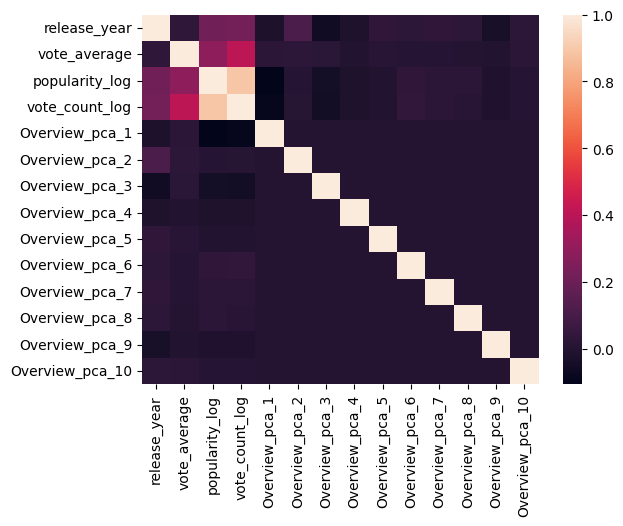

In [ ]:
sns.heatmap(movies_ml_df.select_dtypes(exclude=object).corr())
# observamos una similitud entre vote count y vote average.

In [97]:
# Vamos a juntar las variables relacionados.
movies_ml_df["vote_info"] = movies_ml_df["vote_average"] * movies_ml_df["vote_count_log"]

In [99]:
movies_ml_df["vote_info"].describe()

count    44013.000000
mean        16.542059
std         11.818026
min          0.000000
25%          8.239592
50%         14.205144
75%         22.382385
max         78.143774
Name: vote_info, dtype: float64

In [103]:
movies_ml_df.drop(columns=["vote_average", "vote_count_log"], inplace=True)

In [ ]:
# Guardamos
movies_ml_df.to_csv("transformed_consultas/movies_ml_df_v2.csv")

In [191]:
movies_ml_df = pd.read_csv("transformed_consultas/movies_ml_df_v2.csv", index_col="id")

In [194]:
# removemos indices duplicados, detectados durante el proceso
movies_ml_df = movies_ml_df[~movies_ml_df.index.duplicated(keep='first')]

In [195]:
movies_ml_df.to_csv("transformed_consultas/movies_ml_df_v2_1.csv")

Primero queremos saber como comparar 2 peliculas, por lo cual, iniciaremos con este proceso.

- Tomar los datos de ambas peliculas.
- Computar por separado: 
    - Cosine Similirity para los componentes de OVERVIEW_PCA. 
    - Diferencia entre release - year y posterior escalado. MAX-MIN: [2017-1874] = 143
    - Diferencia entre vote_average y escalado MAX[10]-MIN[0] = 10
    - Diferencia entre popularity_log y escalado MAX[6,3] - MIN[0] = 6,3
    - Diferencia entre vote_count_log y escalado MAX[9,4] - MIN[0] = 9,4
- En base a los calculos anteriores, crear un calculo final que nos de el score o aplicar KNN.

Calculo de Similaridad de Overview

In [89]:
def calc_overview_score(movie_1: int, movie_2: int):
    """Calcula el score de overview entre dos peliculas, movie_1 y movie_2
    con el algoritmo de cosine similarity. Los parámetros de entrada son los IDs."""
    movie_1_data = movies_ml_df.loc[movie_1]
    movie_2_data = movies_ml_df.loc[movie_2]

    pca_columns = [f"Overview_pca_{x}" for x in range(1,11)]

    movie_1_pca = movie_1_data[pca_columns].values.reshape(1,-1)
    movie_2_pca = movie_2_data[pca_columns].values.reshape(1,-1)

    overview_similarity = cosine_similarity(movie_1_pca, movie_2_pca)[0][0]

    return overview_similarity + 1
     

In [90]:
#probamos dos IDs de peliculas.
calc_overview_score(69, 26)

np.float64(0.7749371598087585)

Calculo de similaridad de Genres

In [91]:
def genre_score(movie_1: int, movie_2: int):
    "Calcula la semejanza entre los generos de 2 peliculas en base a la similaridad de coseno"
    movie_1_genres = list(eval(movies_ml_df.loc[movie_1]["genres"]))
    movie_2_genres = list(eval(movies_ml_df.loc[movie_2]["genres"]))

    unique_genres = list(set(movie_1_genres + movie_2_genres))

    vectors_movie_1 = [1 if genre in movie_1_genres else 0 for genre in unique_genres]
    vectors_movie_2 = [1 if genre in movie_2_genres else 0 for genre in unique_genres]

    vector_1 = np.array(vectors_movie_1).reshape(1, -1)
    vector_2 = np.array(vectors_movie_2).reshape(1, -1)

    similarity = cosine_similarity(vector_1, vector_2)[0][0]

    return similarity + 1



In [92]:
#probamos la funcion.
genre_score(6, 5)

np.float64(1.4082482904638631)

Calculo Similaridad de años

Para este caso usaremos una formula exponencial

In [65]:
def year_score(movie_1: int, movie_2: int):
    year_diff = abs(movies_ml_df.loc[movie_1]["release_year"]-movies_ml_df.loc[movie_2]["release_year"])
    score = math.exp(-1*(year_diff/10))
    return score

In [73]:
print(year_score(2,3)) # 2 peliculas con años cercanos
print(year_score(2,69)) # 2 peliculas con años lejanos

0.8187307530779818
0.18268352405273466


Calculo similaridad vote_average

In [115]:
def vote_score(movie_1: int, movie_2: int):
    year_diff = abs(movies_ml_df.loc[movie_1]["vote_info"]-movies_ml_df.loc[movie_2]["vote_info"])
    score = math.exp(-1*(year_diff/20))
    return score

In [116]:
vote_score(11,69)

0.31199014002034664

Calculo similaridad title_collection

In [126]:
def title_score(movie_1: int, movie_2: int):
    "Calcula la semejanza entre los generos de 2 peliculas en base a la similaridad de coseno"
    movie_1_genres = list(eval(movies_ml_df.loc[movie_1]["title_collection"]))
    movie_2_genres = list(eval(movies_ml_df.loc[movie_2]["title_collection"]))

    unique_genres = list(set(movie_1_genres + movie_2_genres))

    vectors_movie_1 = [1 if genre in movie_1_genres else 0 for genre in unique_genres]
    vectors_movie_2 = [1 if genre in movie_2_genres else 0 for genre in unique_genres]

    vector_1 = np.array(vectors_movie_1).reshape(1, -1)
    vector_2 = np.array(vectors_movie_2).reshape(1, -1)

    similarity = cosine_similarity(vector_1, vector_2)[0][0]

    return similarity + 1

In [86]:
title_score(69,6)

np.float64(1.0)

In [124]:
movies_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44013 entries, 2 to 469172
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   release_year             44013 non-null  int64  
 1   popularity_log           44013 non-null  float64
 2   title_collection         44013 non-null  object 
 3   concat_country_language  44013 non-null  object 
 4   genres                   44013 non-null  object 
 5   production_companies     44013 non-null  object 
 6   Overview_pca_1           44013 non-null  float64
 7   Overview_pca_2           44013 non-null  float64
 8   Overview_pca_3           44013 non-null  float64
 9   Overview_pca_4           44013 non-null  float64
 10  Overview_pca_5           44013 non-null  float64
 11  Overview_pca_6           44013 non-null  float64
 12  Overview_pca_7           44013 non-null  float64
 13  Overview_pca_8           44013 non-null  float64
 14  Overview_pca_9           4

Calculo similaridad popularity score

In [123]:
def popularity_score(movie_1:int, movie_2: int):
    score_diff = abs(movies_ml_df.loc[movie_1]["popularity_log"]-movies_ml_df.loc[movie_2]["popularity_log"])
    score = math.exp(-1*(score_diff/3))
    return score

Similaridad concat_country_language

In [125]:
def language_score(movie_1: int, movie_2: int):
    movie_1_language = list(eval(movies_ml_df.loc[movie_1]["concat_country_language"]))
    movie_2_language = list(eval(movies_ml_df.loc[movie_2]["concat_country_language"]))

    unique_languages = list(set(movie_1_language + movie_2_language))

    vectors_movie_1 = [1 if genre in movie_1_language else 0 for genre in unique_languages]
    vectors_movie_2 = [1 if genre in movie_2_language else 0 for genre in unique_languages]

    vector_1 = np.array(vectors_movie_1).reshape(1, -1)
    vector_2 = np.array(vectors_movie_2).reshape(1, -1)

    similarity = cosine_similarity(vector_1, vector_2)[0][0]

    return similarity + 1

Similaridad production_scores

In [131]:
def production_scores(movie_1: int, movie_2: int):
    movie_1_production = list(eval(movies_ml_df.loc[movie_1]["production_companies"]))
    movie_2_production = list(eval(movies_ml_df.loc[movie_2]["production_companies"]))

    unique_languages = list(set(movie_1_production + movie_2_production))

    vectors_movie_1 = [1 if genre in movie_1_production else 0 for genre in unique_languages]
    vectors_movie_2 = [1 if genre in movie_2_production else 0 for genre in unique_languages]

    vector_1 = np.array(vectors_movie_1).reshape(1, -1)
    vector_2 = np.array(vectors_movie_2).reshape(1, -1)

    similarity = cosine_similarity(vector_1, vector_2)[0][0]

    return similarity + 1

## Agregación de funciones

In [ ]:
# opcion 1
def similarity_score(movie_1:int, movie_2:int):
    overview = calc_overview_score(movie_1, movie_2)
    genre = genre_score(movie_1,movie_2)
    year = year_score(movie_1, movie_2)
    vote_average = vote_score(movie_1, movie_2)
    title = title_score(movie_1, movie_2)
    popularity = popularity_score(movie_1, movie_2)
    language = language_score(movie_1, movie_2)
    production = production_scores(movie_1, movie_2)
    
    return overview*genre*year*vote_average*title*popularity*language*production

In [136]:
similarity_score(5,6)

np.float64(1.7688943501083525)

## Calculo de array de similaridad

In [198]:

eval_df = movies_ml_df.head(3000) # dataframe de pruebas
index = eval_df.index.drop_duplicates() # indice
score_list = [similarity_score(2, i) for i in index] #creamos una lista calculando los scores

In [199]:
top_5 = pd.DataFrame(score_list, index=index, columns=["score"]).sort_values(by="score", ascending=False).head(5) # creamos un dataframe y calculamos el top_5
top_5

,score
id,
2,16.000000
7974,2.834255
127,2.238584
3,1.834683
7975,1.762489


In [203]:
list(top_5.index)[1:] # vamos a retornar esta lista y luego convertirlas a nombres de peliculas.

[7974, 127, 3, 7975]

In [204]:
# resumimos en una funcion:
def find_top_5(movie_1: int):
    index = movies_ml_df.index
    score_list = [similarity_score(movie_1, i) for i in index]
    top_5 = pd.DataFrame(score_list, index=index, columns=["score"]).sort_values(by="score", ascending=False).head(6)
    return list(top_5.index)[1:]

In [205]:
# se tomo 2 minutos en calcular todo el dataset.
find_top_5(69)

[9762, 8488, 6957, 1262, 142]

In [1]:
import ml_functions

In [3]:
eval_df = pd.read_csv("transformed_consultas/movies_ml_df_v2_1.csv", index_col="id")

In [4]:
ml_functions.find_top_5(69, eval_df)

[9762, 8488, 6957, 1262, 142]